# description

1. Import Data: Importing dataset.

2. Set Up Stopwords: Get a list of common words to ignore.

3. Convert text to lowercase, tokenize into words, and remove stopwords.

4. Word Frequency: Count how often each word appears in the data.

5. Word Cloud: Create a word cloud to visualize frequent words.

6. TF-IDF: Calculate how important each word is by combining frequency and uniqueness.

7. TF-IDF Word Cloud: Make a word cloud with the most significant words.

8. Keyword Analysis: Track specific keywords over time and visualize with a heatmap.

# TFIDF

In [1]:
## importing dataset

import pandas as pd 

df = pd.read_csv(r"C:\Users\Mouni\Downloads\un-general-debates-blueprint.csv")

df.head(10)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


# Get the stopwords

In [2]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'from', 'these', 'when', 'what', 'having', 'theirs', 'or', 'through', 'your', 'me', 'has', 'up', 'in', 'm', 'between', 'my', 'aren', "couldn't", "should've", 'any', "didn't", 'so', "shan't", 'which', 'some', 'that', 'out', 'each', 'hers', 'the', 'before', 'y', 'wasn', 'doing', 'ours', 'shouldn', "hadn't", 'over', "don't", 'didn', 'did', 'further', "aren't", 're', "doesn't", 'herself', 'who', "you'll", 'but', 'where', 'am', "you'd", "wasn't", 'same', 'below', 'yourselves', 'him', 'their', 'does', 'after', "mustn't", "needn't", 'are', 'yourself', 'only', 'hasn', 'himself', 'can', 'weren', 'above', 'whom', 'down', 'just', "haven't", 'itself', "it's", 'once', 'is', 'd', 'should', 'it', 'very', 'for', 'mightn', "mightn't", 'not', 'how', 'than', 'those', 'at', 'there', 'ain', 'shan', 'his', "shouldn't", 'as', 'doesn', "you've", 'mustn', 'and', 'myself', 've', 'will', 'isn', 'now', 'to', "that'll", 'hadn', "she's", 'our', 'on', 'haven', 'couldn', 'ourselves', 'an', 'all', 'ma', 's', 'i', 'wo

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mouni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Pre-processing pipeline

In [3]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)


In [4]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]


In [5]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


In [6]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

# Now count the tokens


In [8]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, 
orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


# draw the word cloud

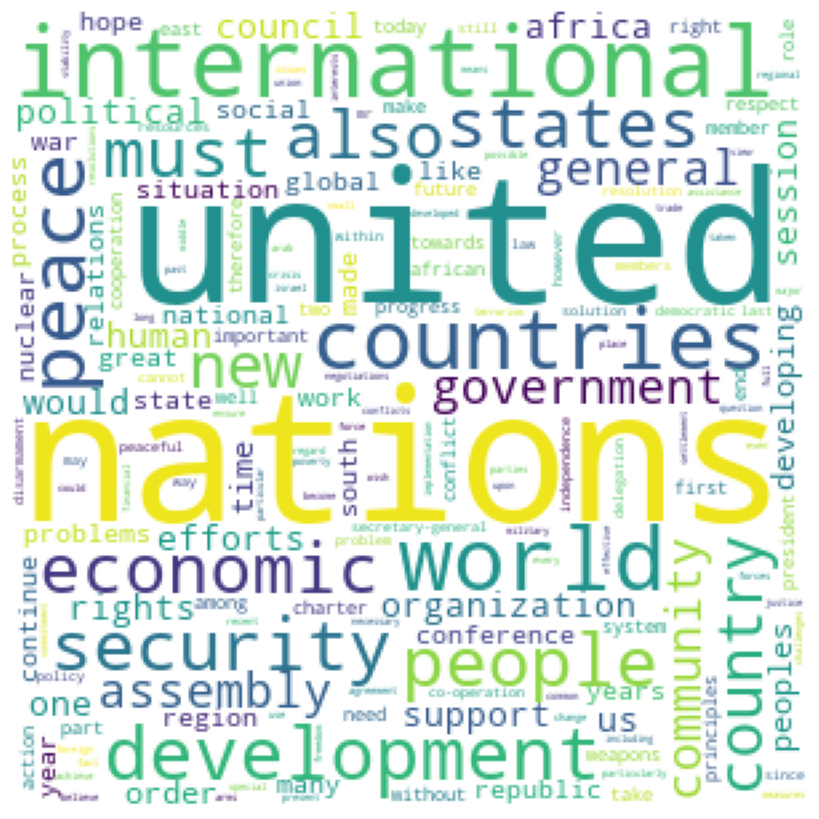

In [9]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, 
margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Now let’s do the TFIDF and compare

In [10]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
 # count tokens
    counter = Counter()
    df[column].map(update)
# create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [11]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()


,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


# Let’s draw the word cloud

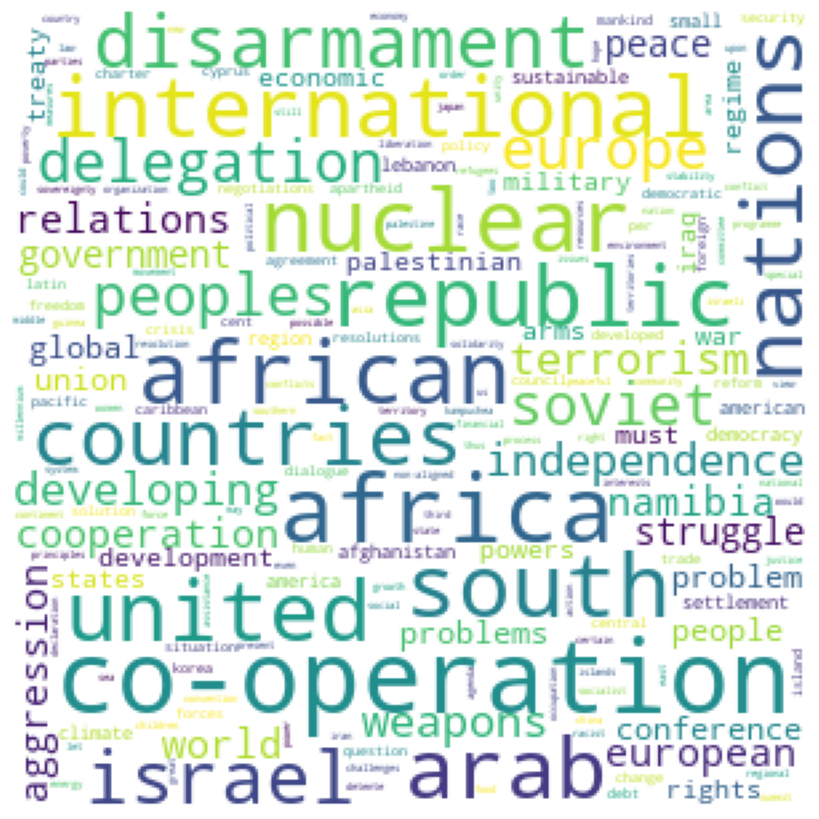

In [12]:
wc = WordCloud(background_color='white', width = 300, 
height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


# Function to count the keywords

In [13]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


# Function to group by year

In [14]:
def count_keywords_by(df, by, keywords, column='tokens'):
 
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
 
    return freq_df.groupby(by=by).sum().sort_values(by)

# Draw!

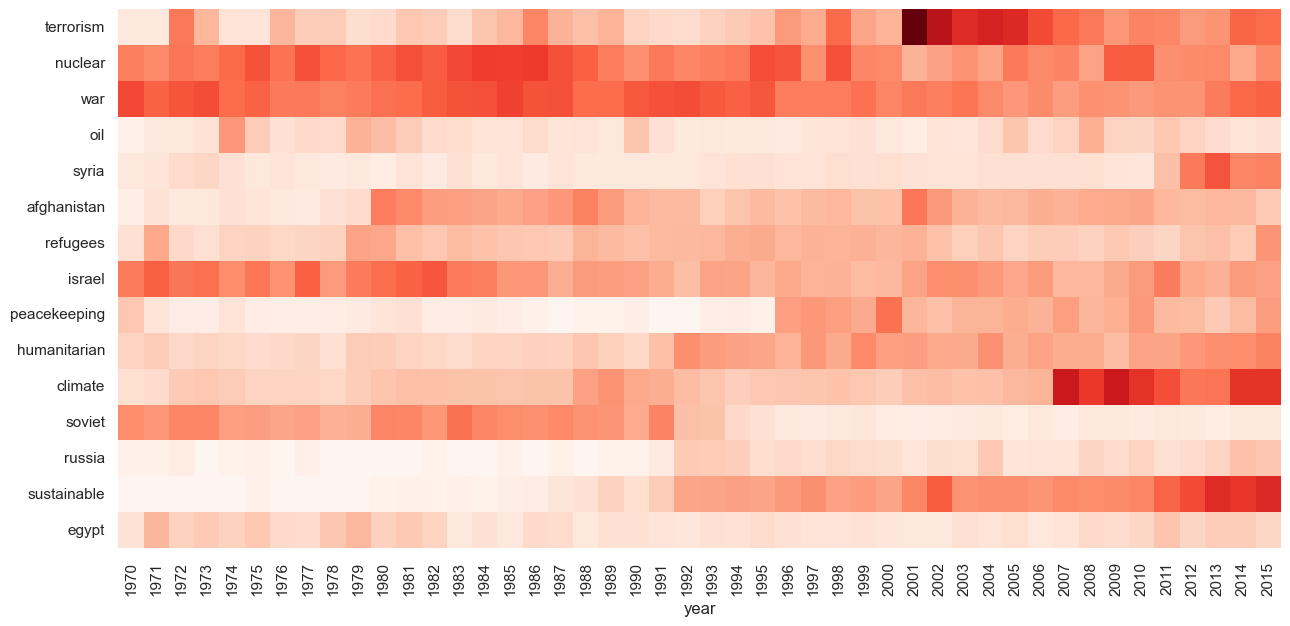

In [15]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil','syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt'] 
freq_df = count_keywords_by(df, by='year', keywords=keywords)

# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)

# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)